In [ ]:
! pip install sequtils
! pip install Bio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.5/283.5 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.5/575.5 KB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 KB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Reading the Data

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/Shareddrives/2:1 Caitlin & Kimai/Data/Enzyme Stability Prediction/train.csv")
data.head()

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [ ]:
print(data['tm'].max())
print(data['tm'].min())

130.0
-1.0


## Special Terms 

- Molecular Weight
    - Protein Molecular Weight accepts one or more protein sequences or DNA coding sequences and calculates molecular weight. When submitting a protein (amino acid) sequence, you can append copies of commonly used epitopes and fusion proteins using the supplied list.
- Gravy
    - The GRAVY number of a protein is a measure of its hydrophobicity or hydrophilicity. The two measures are combined in a hydropathy scale or hydropathy index. Hydropathy here means "hydro", water, + "pathy", activity.
- Amino Acid Count
    - The sequence of a protein is usually notated as a string of letters, according to the order of the amino acids from the amino-terminal to the carboxyl-terminal of the protein. Either a single or three-letter code may be used to represent each amino acid in the sequence.
- Secondary structure fraction
    - The structure refers to the shape in which a long polypeptide chain can exist. They are found to exist in two different types of structures α – helix and β – pleated sheet structures.
- Aromaticity
    - Aromaticity is a chemical property associated with such cyclic and planar compounds and is attributed to these π-electrons which are free to cycle around the circular arrangements of atoms found in the aromatic moieties.
- Isoelectric point
    - The isoelectric point, or pI,represents a point of balance for a molecule, where the external surface charge is a net zero. This factor governs electrophoretic mobility in proteins and also plays a role in identifying peptides from mass spectral proteomics data.

In [ ]:
#getting one protein sequence
protein_sequence = data['protein_sequence'].to_list()
sequence = protein_sequence[0]
print(sequence)

AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVGMIKDAGDDPDVTHGAEIQAFVRFASEDRLEGGEGVGVVTKPGLGVPVGEPAINPVPRRMIWEAVREVTERPLAVTIAIPGGEELAKKTLNPRLGILGGLSVLGTTGVVKPYSTSAFRMSVVQAVGVARANGLLEIAATTGGKSERFAQRLLPHLPEMAFIEMGDFVGDVLRAARKVGVEVVRVVGMIGKISKMADGKTMTHAAGGEVNLSLLLSLLKEAGASPKALKEAEGAATARRFLEIALEEGLELFFVNLVRLAQEKLQAYIGERPFVSVALTDFDEGRCLAAWPDREVYR


#### Geting protein sequence characteristics

In [ ]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

analyse_seq = ProteinAnalysis(sequence)
print(analyse_seq.molecular_weight())
print(analyse_seq.gravy())
print(analyse_seq.count_amino_acids())
print(analyse_seq.get_amino_acids_percent())
print(analyse_seq.secondary_structure_fraction())
print(analyse_seq.instability_index())
print(analyse_seq.aromaticity())
print(analyse_seq.isoelectric_point())

36320.724400000036
0.14809384164222864
{'A': 45, 'C': 1, 'D': 13, 'E': 30, 'F': 13, 'G': 38, 'H': 3, 'I': 14, 'K': 16, 'L': 37, 'M': 8, 'N': 5, 'P': 18, 'Q': 6, 'R': 25, 'S': 11, 'T': 14, 'V': 37, 'W': 4, 'Y': 3}
{'A': 0.13196480938416422, 'C': 0.002932551319648094, 'D': 0.03812316715542522, 'E': 0.08797653958944282, 'F': 0.03812316715542522, 'G': 0.11143695014662756, 'H': 0.008797653958944282, 'I': 0.04105571847507331, 'K': 0.0469208211143695, 'L': 0.10850439882697947, 'M': 0.02346041055718475, 'N': 0.01466275659824047, 'P': 0.05278592375366569, 'Q': 0.017595307917888565, 'R': 0.07331378299120235, 'S': 0.03225806451612903, 'T': 0.04105571847507331, 'V': 0.10850439882697947, 'W': 0.011730205278592375, 'Y': 0.008797653958944282}
(0.31671554252199413, 0.21114369501466276, 0.3519061583577713)
28.389736070381236
0.05865102639296188
6.109589195251464


#### Attaching the charactersitics data to the original dataframe

In [ ]:
def protein_analyser(row):
  from Bio.SeqUtils.ProtParam import ProteinAnalysis
  #selecting protein sequences
  sequence = row['protein_sequence']
  analyse_seq = ProteinAnalysis(sequence)

  #molecular weight
  row['molecular_weight'] = analyse_seq.molecular_weight()

  #gravy
  row['gravy'] = analyse_seq.gravy()

  #count amino acids
  row['amino_acid_count'] = analyse_seq.count_amino_acids()

  #aromaticity
  row['aromaticity'] = analyse_seq.aromaticity()

  #isoelectric point
  row['isoelectric_point'] = analyse_seq.isoelectric_point()

  #secondary structure fraction
  ssf = analyse_seq.secondary_structure_fraction()
  #return a list helix, turn, sheet

  row['helix'] = ssf[0]
  row['turn'] = ssf[1]
  row['sheet'] = ssf[2]

  return row

#setting to the dataframe
df_analysed = data.apply(lambda row: protein_analyser(row), axis = 1)
df_analysed.head()


,seq_id,protein_sequence,pH,data_source,tm,molecular_weight,gravy,amino_acid_count,aromaticity,isoelectric_point,helix,turn,sheet
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7,36320.7244,0.148094,"{'A': 45, 'C': 1, 'D': 13, 'E': 30, 'F': 13, '...",0.058651,6.109589,0.316716,0.211144,0.351906
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5,32837.9931,-1.089510,"{'A': 28, 'C': 0, 'D': 10, 'E': 52, 'F': 6, 'G...",0.041958,5.144349,0.213287,0.160839,0.367133
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5,53428.8034,-0.710463,"{'A': 50, 'C': 9, 'D': 27, 'E': 32, 'F': 21, '...",0.080483,9.032101,0.209256,0.267606,0.213280
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2,29475.5996,-0.507925,"{'A': 20, 'C': 5, 'D': 19, 'E': 29, 'F': 12, '...",0.071698,4.683840,0.267925,0.215094,0.298113
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5,158761.9814,-0.400896,"{'A': 86, 'C': 14, 'D': 78, 'E': 78, 'F': 32, ...",0.065472,5.917928,0.271537,0.292901,0.206065


In [ ]:
df_analysed.columns

Index(['seq_id', 'protein_sequence', 'pH', 'data_source', 'tm',
       'molecular_weight', 'gravy', 'amino_acid_count', 'aromaticity',
       'isoelectric_point', 'helix', 'turn', 'sheet'],
      dtype='object')

In [ ]:
df_analysed.to_csv("/content/drive/Shareddrives/2:1 Caitlin & Kimai/Data/Enzyme Stability Prediction/Experiment Results/properties_without_acc.csv", index = False)

## Model Building

In [ ]:
#dropping unwanted columns
df_analysed.drop(['seq_id','data_source','protein_sequence'], axis = 1, inplace  =True)
df_analysed.head()

,pH,tm,molecular_weight,gravy,amino_acid_count,aromaticity,isoelectric_point,helix,turn,sheet
0,7.0,75.7,36320.7244,0.148094,"{'A': 45, 'C': 1, 'D': 13, 'E': 30, 'F': 13, '...",0.058651,6.109589,0.316716,0.211144,0.351906
1,7.0,50.5,32837.9931,-1.089510,"{'A': 28, 'C': 0, 'D': 10, 'E': 52, 'F': 6, 'G...",0.041958,5.144349,0.213287,0.160839,0.367133
2,7.0,40.5,53428.8034,-0.710463,"{'A': 50, 'C': 9, 'D': 27, 'E': 32, 'F': 21, '...",0.080483,9.032101,0.209256,0.267606,0.213280
3,7.0,47.2,29475.5996,-0.507925,"{'A': 20, 'C': 5, 'D': 19, 'E': 29, 'F': 12, '...",0.071698,4.683840,0.267925,0.215094,0.298113
4,7.0,49.5,158761.9814,-0.400896,"{'A': 86, 'C': 14, 'D': 78, 'E': 78, 'F': 32, ...",0.065472,5.917928,0.271537,0.292901,0.206065


In [ ]:
print("Shape of the data: {}".format(df_analysed.shape))

Shape of the data: (31390, 10)


In [ ]:
#checking for null values
df_analysed.isnull().sum()

pH                   286
tm                     0
molecular_weight       0
gravy                  0
amino_acid_count       0
aromaticity            0
isoelectric_point      0
helix                  0
turn                   0
sheet                  0
dtype: int64

In [ ]:
#dropping null values
print("data before removing nulls: {}".format(df_analysed.shape))
df_analysed.dropna(how = 'any',inplace = True)
print("data after removing nulls: {}".format(df_analysed.shape))

data before removing nulls: (31390, 10)
data after removing nulls: (31104, 10)


In [ ]:
df_analysed['amino_acid_count']

0        {'A': 45, 'C': 1, 'D': 13, 'E': 30, 'F': 13, '...
1        {'A': 28, 'C': 0, 'D': 10, 'E': 52, 'F': 6, 'G...
2        {'A': 50, 'C': 9, 'D': 27, 'E': 32, 'F': 21, '...
3        {'A': 20, 'C': 5, 'D': 19, 'E': 29, 'F': 12, '...
4        {'A': 86, 'C': 14, 'D': 78, 'E': 78, 'F': 32, ...
                               ...                        
31385    {'A': 33, 'C': 12, 'D': 38, 'E': 31, 'F': 18, ...
31386    {'A': 37, 'C': 5, 'D': 21, 'E': 29, 'F': 22, '...
31387    {'A': 13, 'C': 1, 'D': 7, 'E': 7, 'F': 7, 'G':...
31388    {'A': 47, 'C': 5, 'D': 34, 'E': 36, 'F': 23, '...
31389    {'A': 34, 'C': 5, 'D': 15, 'E': 32, 'F': 26, '...
Name: amino_acid_count, Length: 31104, dtype: object

# Experiment 01

### Without amino acid count

In [ ]:
#taking a copy of the dataframe
df_test = df_analysed.copy()
#deopping amino_acid_count and sequences
df1 = df_analysed.drop("amino_acid_count", axis = 1)

In [ ]:
df1.head()

,pH,tm,molecular_weight,gravy,aromaticity,isoelectric_point,helix,turn,sheet
0,7.0,75.7,36320.7244,0.148094,0.058651,6.109589,0.316716,0.211144,0.351906
1,7.0,50.5,32837.9931,-1.089510,0.041958,5.144349,0.213287,0.160839,0.367133
2,7.0,40.5,53428.8034,-0.710463,0.080483,9.032101,0.209256,0.267606,0.213280
3,7.0,47.2,29475.5996,-0.507925,0.071698,4.683840,0.267925,0.215094,0.298113
4,7.0,49.5,158761.9814,-0.400896,0.065472,5.917928,0.271537,0.292901,0.206065


In [ ]:
#checking the duplicates
df1.duplicated().sum()

916

In [ ]:
#drop the duplicates
print("Before removing the dupliactes: {}".format(df1.shape))
df1.drop_duplicates(inplace = True)
print("After removing the dupliactes: {}".format(df1.shape))

Before removing the dupliactes: (31104, 9)
After removing the dupliactes: (30188, 9)


In [ ]:
#modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = df1.drop('tm', axis = 1)
Y = df1['tm']

x_train, x_test, y_train,y_test = train_test_split(X, Y, test_size = 0.2)

#model fitting
model = KNeighborsRegressor()
model.fit(x_train, y_train)

#predictions
y_pred = model.predict(x_test)
print("R2_score is : {}".format(r2_score(y_test,y_pred)))
print("mean squared error: {}".format(mean_squared_error(y_test,y_pred)))
print("root mean squared error: {}".format(np.sqrt(mean_squared_error(y_pred,y_test))))

R2_score is : -0.03164095629826602
mean squared error: 184.85246505465383
root mean squared error: 13.596045934559571


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

dct = DecisionTreeRegressor()
dct.fit(x_train, y_train)

#predictions
y_pred = dct.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root mean squared value", rmse)

Root mean squared value 13.961621378828843


In [ ]:
0.40999518397669177*100

40.99951839766918

# Experiment 02

### With amino acid count

In [ ]:
#getting a copy of the dataframe
df2 = df_test.copy()
df2.head()

,pH,tm,molecular_weight,gravy,amino_acid_count,aromaticity,isoelectric_point,helix,turn,sheet
0,7.0,75.7,36320.7244,0.148094,"{'A': 45, 'C': 1, 'D': 13, 'E': 30, 'F': 13, '...",0.058651,6.109589,0.316716,0.211144,0.351906
1,7.0,50.5,32837.9931,-1.089510,"{'A': 28, 'C': 0, 'D': 10, 'E': 52, 'F': 6, 'G...",0.041958,5.144349,0.213287,0.160839,0.367133
2,7.0,40.5,53428.8034,-0.710463,"{'A': 50, 'C': 9, 'D': 27, 'E': 32, 'F': 21, '...",0.080483,9.032101,0.209256,0.267606,0.213280
3,7.0,47.2,29475.5996,-0.507925,"{'A': 20, 'C': 5, 'D': 19, 'E': 29, 'F': 12, '...",0.071698,4.683840,0.267925,0.215094,0.298113
4,7.0,49.5,158761.9814,-0.400896,"{'A': 86, 'C': 14, 'D': 78, 'E': 78, 'F': 32, ...",0.065472,5.917928,0.271537,0.292901,0.206065


In [ ]:
#creating seperate columns for seperate acids
def amino_acid_count(row):

  row1 = row['amino_acid_count']
  for key,value in row1.items():
    row[key] = value

  return row

#setting the columns
df3 = df_test.apply(lambda x: amino_acid_count(x), axis = 1)
df3.head()

,pH,tm,molecular_weight,gravy,amino_acid_count,aromaticity,isoelectric_point,helix,turn,sheet,...,M,N,P,Q,R,S,T,V,W,Y
0,7.0,75.7,36320.7244,0.148094,"{'A': 45, 'C': 1, 'D': 13, 'E': 30, 'F': 13, '...",0.058651,6.109589,0.316716,0.211144,0.351906,...,8,5,18,6,25,11,14,37,4,3
1,7.0,50.5,32837.9931,-1.089510,"{'A': 28, 'C': 0, 'D': 10, 'E': 52, 'F': 6, 'G...",0.041958,5.144349,0.213287,0.160839,0.367133,...,2,6,8,22,30,14,12,13,3,3
2,7.0,40.5,53428.8034,-0.710463,"{'A': 50, 'C': 9, 'D': 27, 'E': 32, 'F': 21, '...",0.080483,9.032101,0.209256,0.267606,0.213280,...,6,15,20,25,31,33,30,30,3,16
3,7.0,47.2,29475.5996,-0.507925,"{'A': 20, 'C': 5, 'D': 19, 'E': 29, 'F': 12, '...",0.071698,4.683840,0.267925,0.215094,0.298113,...,2,9,16,9,10,16,19,14,3,4
4,7.0,49.5,158761.9814,-0.400896,"{'A': 86, 'C': 14, 'D': 78, 'E': 78, 'F': 32, ...",0.065472,5.917928,0.271537,0.292901,0.206065,...,31,65,128,54,63,148,120,124,16,47


In [ ]:
#dropping the amino acid count
df3.drop('amino_acid_count', axis = 1, inplace = True)

In [ ]:
df3.to_csv("/content/drive/Shareddrives/2:1 Caitlin & Kimai/Data/Enzyme Stability Prediction/amino_acid_count&train.csv", index = False)

In [ ]:
#checking for nulls
df3.isnull().sum()

pH                   0
tm                   0
molecular_weight     0
gravy                0
aromaticity          0
isoelectric_point    0
helix                0
turn                 0
sheet                0
A                    0
C                    0
D                    0
E                    0
F                    0
G                    0
H                    0
I                    0
K                    0
L                    0
M                    0
N                    0
P                    0
Q                    0
R                    0
S                    0
T                    0
V                    0
W                    0
Y                    0
dtype: int64

In [ ]:
df3.duplicated().sum()

916

In [ ]:
df3.drop_duplicates(inplace = True)

In [ ]:
df3.duplicated().sum()

0

#### Data analysis

In [ ]:
#getting correlations
df3.corr()

,pH,tm,molecular_weight,gravy,aromaticity,isoelectric_point,helix,turn,sheet,A,...,M,N,P,Q,R,S,T,V,W,Y
pH,1.000000,-0.043556,0.027984,0.033810,0.017556,-0.168514,0.015102,0.063812,0.012034,0.027799,...,0.033353,0.012796,0.037778,0.023693,0.017071,0.033409,0.017753,0.025826,0.003498,0.032216
tm,-0.043556,1.000000,-0.070434,0.162912,-0.021249,-0.004042,0.151351,-0.045445,0.238416,-0.030167,...,-0.102148,-0.111872,-0.034911,-0.105700,-0.019524,-0.101196,-0.086692,-0.042156,-0.055877,-0.053801
molecular_weight,0.027984,-0.070434,1.000000,-0.089959,-0.081183,-0.108336,-0.090844,0.081573,-0.008606,0.943470,...,0.858770,0.920627,0.920217,0.858656,0.949099,0.950770,0.963261,0.956608,0.871250,0.919121
gravy,0.033810,0.162912,-0.089959,1.000000,0.134479,-0.042063,0.725709,-0.099187,0.276203,-0.000693,...,-0.040794,-0.149004,-0.096177,-0.183666,-0.145971,-0.132150,-0.066923,0.018108,-0.031418,-0.066713
aromaticity,0.017556,-0.021249,-0.081183,0.134479,1.000000,-0.009836,0.513395,-0.013709,-0.332949,-0.163022,...,-0.089708,-0.043241,-0.099116,-0.161982,-0.134953,-0.122341,-0.078304,-0.077016,0.142858,0.143300
isoelectric_point,-0.168514,-0.004042,-0.108336,-0.042063,-0.009836,1.000000,-0.039038,0.043642,-0.158127,-0.115688,...,-0.112352,-0.113943,-0.056017,-0.109417,-0.033026,-0.085650,-0.089078,-0.089550,-0.075598,-0.104323
helix,0.015102,0.151351,-0.090844,0.725709,0.513395,-0.039038,1.000000,-0.361402,0.104928,-0.125096,...,-0.081644,-0.114383,-0.158933,-0.205995,-0.131925,-0.175263,-0.100508,-0.008133,0.031623,0.029536
turn,0.063812,-0.045445,0.081573,-0.099187,-0.013709,0.043642,-0.361402,1.000000,-0.500362,0.059403,...,0.053711,0.182497,0.219998,0.107299,0.041418,0.224351,0.096126,0.048134,0.063430,0.082056
sheet,0.012034,0.238416,-0.008606,0.276203,-0.332949,-0.158127,0.104928,-0.500362,1.000000,0.146353,...,0.032646,-0.140695,-0.050780,-0.009092,0.049872,-0.088783,-0.059327,-0.002307,-0.057996,-0.105011
A,0.027799,-0.030167,0.943470,-0.000693,-0.163022,-0.115688,-0.125096,0.059403,0.146353,1.000000,...,0.822744,0.840843,0.864572,0.847475,0.907850,0.889969,0.894720,0.896508,0.799049,0.825217


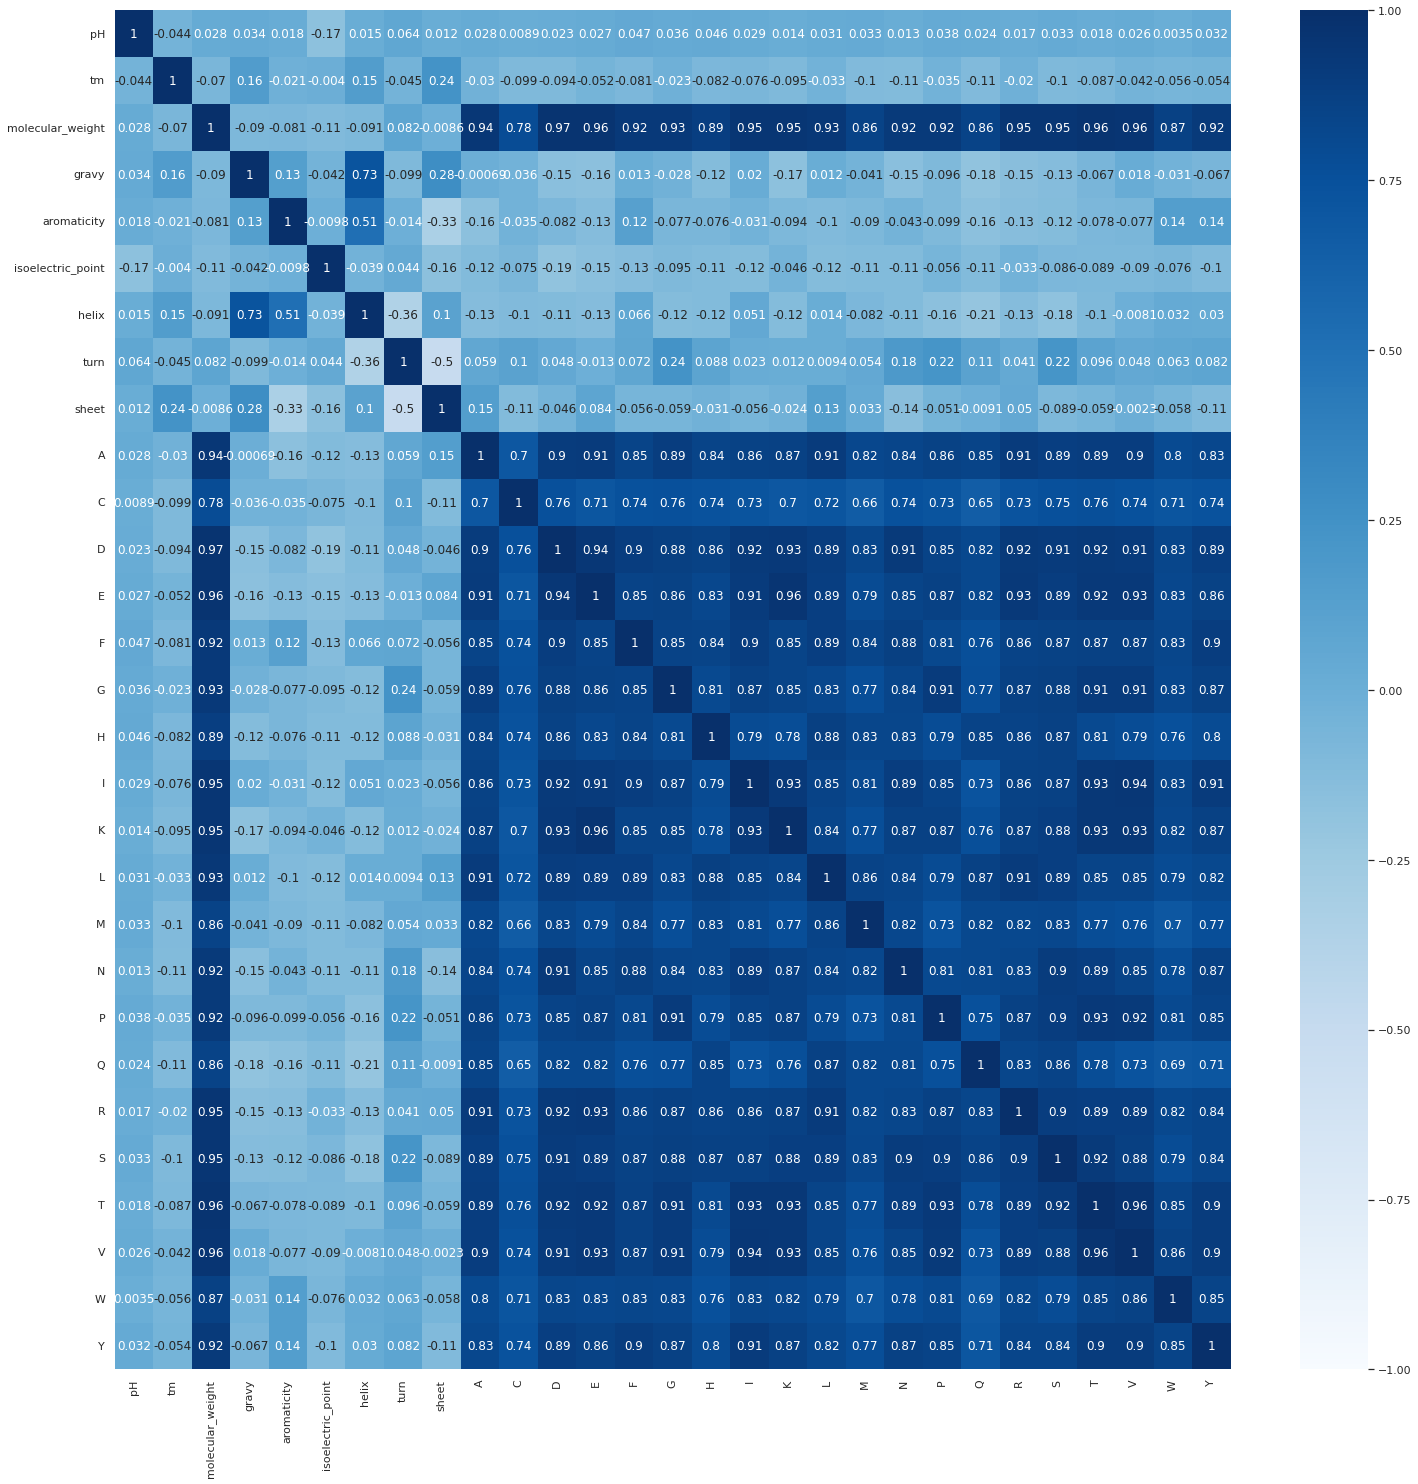

In [ ]:
#plotting the graph
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
plt.figure(figsize = (25,25))
sns.heatmap(df3.corr(), annot = True, vmin = -1, vmax = 1, cmap = "Blues")
plt.show()

In [ ]:
#modeling
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = df3.drop('tm', axis = 1)
Y = df3['tm']

x_train, x_test, y_train,y_test = train_test_split(X, Y, test_size = 0.2)

#model fitting
model = KNeighborsRegressor()
model.fit(x_train, y_train)

#predictions
y_pred = model.predict(x_test)
print("R2_score is : {}".format(r2_score(y_test,y_pred)))
print("mean squared error: {}".format(mean_squared_error(y_pred,y_test)))
print("root mean squared error: {}".format(np.sqrt(mean_squared_error(y_pred,y_test))))

R2_score is : 0.14151828321579396
mean squared error: 149.56649711825108
root mean squared error: 12.229738227707536


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

dct = DecisionTreeRegressor()
dct.fit(x_train, y_train)

#predictions
y_pred = dct.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root mean squared value", rmse)

Root mean squared value 12.274094577320252
